<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

## Proyecto
Las decisiones de compra en línea dependen de cómo los consumidores interactúan con el contenido de la tienda en línea. Trabajas para una nueva empresa emergente que acaba de lanzar un nuevo sitio web de compras en línea. El equipo de marketing te pide, como nuevo científico de datos, que revises un conjunto de datos sobre las intenciones de compra de los compradores en línea recopilados durante el último año. Específicamente, el equipo quiere que generes algunos conocimientos sobre los comportamientos de navegación de los clientes en noviembre y diciembre, los meses más ocupados para los compradores. Has decidido identificar dos grupos de clientes: aquellos con una baja tasa de compra y los clientes recurrentes. Después de identificar estos grupos, deseas determinar la probabilidad de que alguno de estos clientes realice una compra en una nueva campaña de marketing para ayudar a evaluar el éxito potencial de las ventas del próximo año.

### Descripción de los datos:

Se te proporciona un archivo `online_shopping_session_data.csv` que contiene varias columnas sobre cada sesión de compra. Cada sesión de compra correspondió a un solo usuario.

| Columna                   | Descripción                                                                |
|---------------------------|----------------------------------------------------------------------------|
| `SessionID`               | ID único de la sesión                                                      |
| `Administrative`          | Número de páginas visitadas relacionadas con la cuenta del cliente         |
| `Administrative_Duration` | Tiempo total (en segundos) pasado en páginas administrativas               |
| `Informational`           | Número de páginas visitadas relacionadas con el sitio web y la empresa     |
| `Informational_Duration`  | Tiempo total (en segundos) pasado en páginas informativas                  |
| `ProductRelated`          | Número de páginas visitadas relacionadas con productos disponibles         |
| `ProductRelated_Duration` | Tiempo total (en segundos) pasado en páginas relacionadas con productos    |
| `BounceRates`             | Tasa de rebote promedio de las páginas visitadas por el cliente            |
| `ExitRates`               | Tasa de salida promedio de las páginas visitadas por el cliente            |
| `PageValues`              | Valor promedio de las páginas visitadas por el cliente                     |
| `SpecialDay`              | Proximidad del tiempo de visita del sitio a un día especial específico     |
| `Weekend`                 | Indicador de si la sesión es en un fin de semana                           |
| `Month`                   | Mes de la fecha de la sesión                                               |
| `CustomerType`            | Tipo de cliente                                                            |
| `Purchase`                | Etiqueta de clase que indica si el cliente realizó una compra              |

The marketing team asked you to analyze the behavior of online customers during November and December, the busiest months for shoppers.

What are the purchase rates for online shopping sessions by customer type for November and December? Store the result in a dictionary called purchase_rates in the format below using the exact names for keys.
purchase_rates = {"Returning_Customer": 0.254, "New_Customer": 0.276}

What is the strongest correlation in total time spent among page types by returning customers in November and December? Store the result in a dictionary called top_correlation in the format below using the exact names for keys.
top_correlation = {"pair": (x_duration, y_duration), "correlation": 0.345}

A new campaign for the returning customers will boost the purchase rate by 15%. What is the likelihood of achieving at least 100 sales out of 500 online shopping sessions for the returning customers? Store the result in a variable called prob_at_least_100_sales. Optional: plot a binomial probability distribution chart to visualize your chances.

## Instrucciones:

El equipo de marketing te pidió que analizaras el comportamiento de los clientes en línea durante noviembre y diciembre, los meses más ocupados para los compradores.

¿Cuáles son las tasas de compra para las sesiones de compras en línea por tipo de cliente en noviembre y diciembre? Guarda el resultado en un diccionario llamado `purchase_rates` en el formato que se muestra a continuación utilizando los nombres exactos para las claves.
```python
purchase_rates = {"Returning_Customer": 0.254, "New_Customer": 0.276}
```

¿Cuál es la correlación más fuerte en el tiempo total invertido entre los tipos de página por parte de los clientes recurrentes en noviembre y diciembre? Guarda el resultado en un diccionario llamado `top_correlation` en el formato que se muestra a continuación utilizando los nombres exactos para las claves.
```python
top_correlation = {"pair": (x_duration, y_duration), "correlation": 0.345}
```

Una nueva campaña para los clientes recurrentes aumentará la tasa de compra en un 15%. ¿Cuál es la probabilidad de lograr al menos 100 ventas de 500 sesiones de compras en línea para los clientes recurrentes? Guarda el resultado en una variable llamada `prob_at_least_100_sales`. Opcional: traza un gráfico de distribución de probabilidad binomial para visualizar tus posibilidades.

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


Cómo abordar el proyecto
1. Calcular las tasas de compra en línea por tipo de cliente

2. Identificar la correlación más fuerte entre las variables de duración

3. Calcular la probabilidad binomial de ventas

In [5]:
# Start your code here!
# Use as many cells as you like
shopping_data['CustomerType'].unique()

print(shopping_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SessionID                12055 non-null  int64  
 1   Administrative           12055 non-null  int64  
 2   Administrative_Duration  12055 non-null  float64
 3   Informational            12055 non-null  int64  
 4   Informational_Duration   12055 non-null  float64
 5   ProductRelated           12055 non-null  int64  
 6   ProductRelated_Duration  12055 non-null  float64
 7   BounceRates              12055 non-null  float64
 8   ExitRates                12055 non-null  float64
 9   PageValues               12055 non-null  float64
 10  SpecialDay               12055 non-null  float64
 11  Weekend                  12055 non-null  bool   
 12  Month                    12055 non-null  object 
 13  CustomerType             12054 non-null  object 
 14  Purchase              

In [6]:
shopping_data.isna().sum()



SessionID                  0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Weekend                    0
Month                      0
CustomerType               1
Purchase                   1
dtype: int64

In [7]:
#valores nulos
shopping_data.dropna(inplace=True)

print(shopping_data.isna().sum())

print(shopping_data['CustomerType'].unique())

SessionID                  0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Weekend                    0
Month                      0
CustomerType               0
Purchase                   0
dtype: int64
['Returning_Customer' 'New_Customer']


In [8]:
#Calcular las tasas de compra en línea por tipo de cliente
#Querrás hacer un subconjunto de los datos para mantener solo las sesiones de compras de noviembre y diciembre, 
# luego encontrar el número total de sesiones y compras por tipo de cliente para obtener la tasa.




# aca arme un subconjuto filtrado por mes
shopping_Nov_Dec= shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]

# Preview to make sure the subset is correct
print(shopping_Nov_Dec.head())

# Make sure we only have November and December data
print(shopping_Nov_Dec['Month'].unique())



      SessionID  Administrative  Administrative_Duration  Informational  \
5463       5464               1                     39.2              2   
5464       5465               3                     89.6              0   
5467       5468               4                    204.2              0   
5479       5480               0                      0.0              0   
5494       5495               0                      0.0              0   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
5463                   120.8               7                80.500000   
5464                     0.0              57              1721.906667   
5467                     0.0              31               652.376667   
5479                     0.0              13               710.066667   
5494                     0.0              24               968.692424   

      BounceRates  ExitRates  PageValues  SpecialDay  Weekend Month  \
5463     0.000000   0.010000    0.00000

Calcular la frecuencia de sesiones por tipo de cliente
Para obtener purchase_rates, necesitas conocer el número total de sesiones así como el número de compras para cada tipo de cliente. Esto se puede obtener mirando el número de filas en el DataFrame después de hacer un subconjunto por un tipo específico de CustomerType y estado de Purchase.
Puedes usar .groupby([var1, var2]) seguido del método .value_counts() para obtener el recuento de filas por CustomerType y Purchase. Almacena la serie de pandas resultante en una nueva variable.
Puedes usar "New_Customer" para hacer un subconjunto de los resultados de .value_counts() y aplicar la función np.sum() para obtener el número total de sesiones para "New_Customer".
Puedes usar una tupla ("New_Customer", 1) para hacer un subconjunto de los resultados de .value_counts() y obtener el número de compras para "New_Customer".

In [9]:
#costumer_type= df_sub.groupby('CustomerType')['Returning_Customer','New_Customer'].value_counts() mi respuesta es erronea

count_session = shopping_Nov_Dec.groupby(['CustomerType'])['Purchase'].value_counts()

#total_new = count_session[count_session['CustomerType']== 'New_Customer'].values_count().np.sum()Mi respuesta es incorrecta
total_new_customer = np.sum(count_session['New_Customer'])

total_returning = np.sum(count_session['Returning_Customer'])


print(count_session)
print(total_new_customer)
print(total_returning)



CustomerType        Purchase
New_Customer        0.0          529
                    1.0          199
Returning_Customer  0.0         2994
                    1.0          728
Name: count, dtype: int64
728
3722


In [10]:
#numero total de compras por CustemerType
purchase_new_custumer = count_session[('New_Customer',1)]

purchase_returing_custumer = count_session[('Returning_Customer', 1)]

print(purchase_new_custumer)
print(purchase_returing_custumer)

199
728


In [11]:
#calcular la tasa de compra 
purchase_rate_new = purchase_new_custumer/total_new_customer

purchase_rate_returing = purchase_returing_custumer/ total_returning

purchase_rates = {"Returning_Customer": purchase_rate_returing, "New_Customer": purchase_rate_new}
print(purchase_rates)

{'Returning_Customer': 0.1955937667920473, 'New_Customer': 0.2733516483516483}


Seleccionar las variables de duración relevantes
* Identifica todas las columnas de duración del conjunto de datos para las cuales necesitas determinar la correlación.
* Una correlación se calcula entre cada par de variables. Deberías estar calculando la correlación tres veces.
* Para calcular la correlación entre dos columnas en un DataFrame, puedes usar el método df['col1'].corr(df['col2']) en una serie de pandas.
* Informa el par con la correlación más fuerte como una tupla y el valor de la correlación como un float.
* Las respuestas finales deben guardarse en un diccionario con la sintaxis y los nombres exactos de las claves como se muestra a continuación. * top_correlation = {"pair": (x_duration, y_duration), "correlation": 0.345}

In [12]:
cor_admin_info = shopping_Nov_Dec['Administrative_Duration'].corr(shopping_Nov_Dec['Informational_Duration'])
cor_admin_product= shopping_Nov_Dec['Administrative_Duration'].corr(shopping_Nov_Dec['ProductRelated_Duration'])
cor_product_info = shopping_Nov_Dec['ProductRelated_Duration'].corr(shopping_Nov_Dec['Informational_Duration'])

print(cor_admin_info)
print(cor_admin_product)
print(cor_product_info)

0.24468855792839375
0.38985460032069646
0.3671255253444218


Tendrás que calcular la tasa de compra mejorada para los clientes que regresan, que ahora es un 15% mayor que la tasa actual. Recuerda que la variable Compra es una variable aleatoria binomial. Por lo tanto, puedes usar la función de distribución acumulativa binomial para encontrar la probabilidad.

Calcula la tasa de compra mejorada para los clientes que regresan
La nueva tasa de compra es un 15% mayor que la tasa de compra actual para los clientes que regresan.
Para obtener este número, multiplica 1,15 por la tasa de compra actual de los clientes que regresan.

La variable Compra solo toma un valor de 0 o 1. Una variable de resultado binaria sigue la distribución de probabilidad binomial.
La distribución de probabilidad binomial se caracteriza por la probabilidad de éxito (p) y el número de ensayos (n). En nuestro caso, la tasa de compra representa p mientras que el número de sesiones representa n.
Una función de distribución acumulativa (cdf) proporciona la función de probabilidad que proporciona la probabilidad de que una variable aleatoria X sea menor o igual a k. En la distribución binomial, k es el número de compras. Para obtener la probabilidad de tener k compras o menos, puede utilizar la función scipy.stats.binom.cdf() con los argumentos k, n y p.

In [13]:
top_correlation ={"pair":('Administrative_Duration','ProductRelated_Duration'),"correlation": cor_admin_product }

top_correlation

{'pair': ('Administrative_Duration', 'ProductRelated_Duration'),
 'correlation': 0.38985460032069646}

In [14]:
print('Current purchase rate for the returning customer:', purchase_rate_returing)

incrased_purchase_rate_returning = 1.15*purchase_rate_returing

print("Increased purchase rate for the returning customer:", incrased_purchase_rate_returning)

# First, we find the likelihood of having <100 sales of 500 sessions
# We can find this from binomial cdf
prob_sales_100_less = stats.binom.cdf(k=100, n=500, p=incrased_purchase_rate_returning)
print('probability of having <100 sales: ', prob_sales_100_less)

Current purchase rate for the returning customer: 0.1955937667920473
Increased purchase rate for the returning customer: 0.22493283181085436
probability of having <100 sales:  0.09877786609627338


In [15]:
# Entonces, para encontrar la probabilidad de tener 100 o más ventas es 1-prob_ventas_100_menos
prob_at_least_100_sales = 1-prob_sales_100_less
print("probability of having at least 100 sales:", prob_at_least_100_sales)

probability of having at least 100 sales: 0.9012221339037266


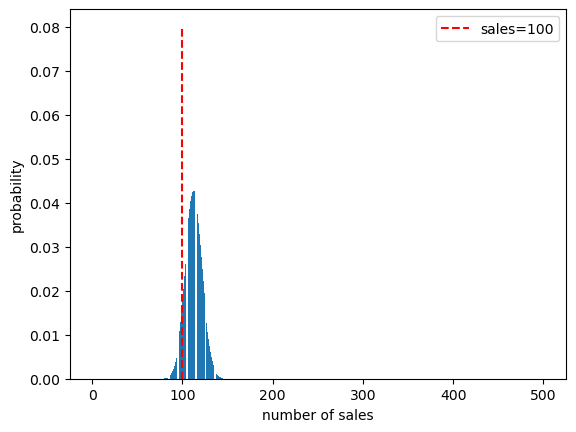

In [16]:
n_sessions = 500
k_values = np.arange(500) + 1
p_binom_values = [stats.binom.pmf(k, n_sessions, incrased_purchase_rate_returning)for k in k_values]
plt.bar(k_values,p_binom_values)
plt.vlines(100, 0, 0.08, colors='r', linestyles='dashed', label="sales=100")

plt.xlabel('number of sales')
plt.ylabel('probability')
plt.legend()
plt.show()
